<!-- 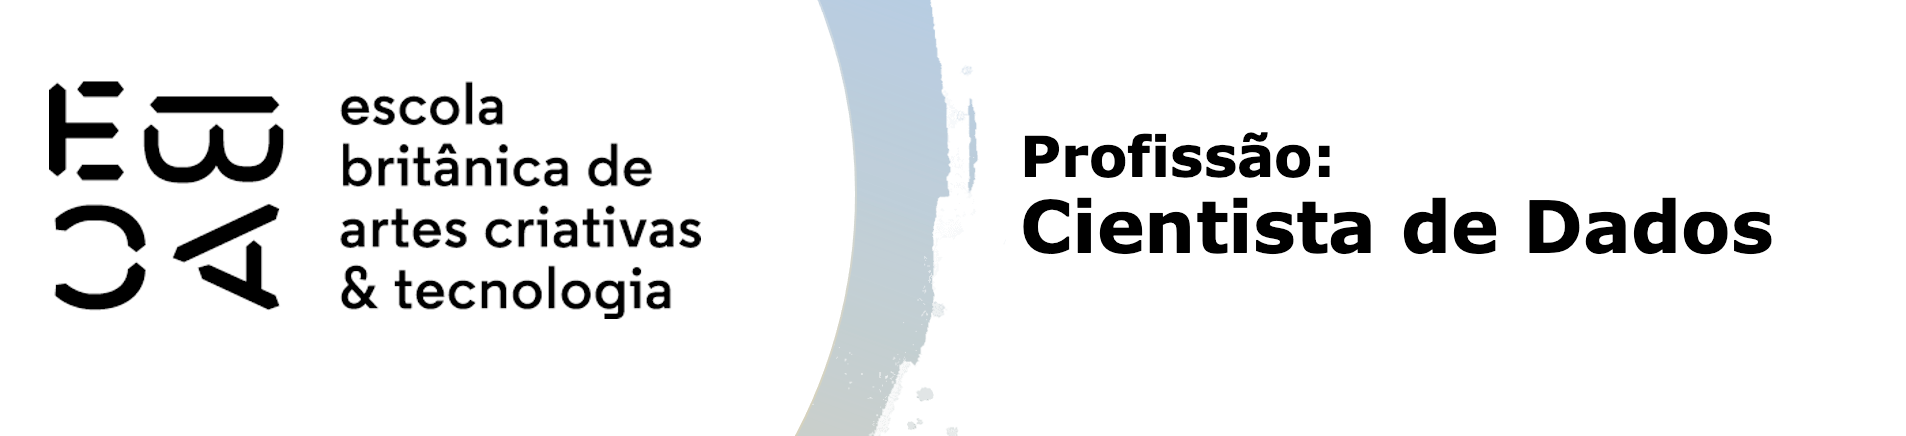 -->

[![ebac_logo-data_science.png](https://raw.githubusercontent.com/rhatiro/Curso_EBAC-Profissao_Cientista_de_Dados/main/ebac-course-utils/media/logo/ebac_logo-data_science.png)](https://github.com/rhatiro/Curso_EBAC-Profissao_Cientista_de_Dados)
<!-- <img src="https://raw.githubusercontent.com/rhatiro/Curso_EBAC-Profissao_Cientista_de_Dados/main/ebac-course-utils/media/logo/ebac_logo-data_science.png" alt="ebac_logo-data_science"> -->

---

<!-- # **Profissão: Cientista de Dados** -->
### **Módulo 36** | Descritiva IV - Visualização de dados categorizados | Exercício 1

**Aluno:** [Roberto Hatiro Nishiyama](https://www.linkedin.com/in/rhatiro/)<br>
**Data:** 24 de Setembro de 2024.

---

# Tarefa

Carregue a base ```NFP.ftr```. Essa base é proveniente do projeto #AMABiliDados, e contém dados da nota fiscal paulista cadastrados para doação automática para a AMA, Associação de Amigos do Autista. 

A *Nota Fiscal Paulista* é um programa de incentivo do governo do estado de São Paulo, que retorna um pedacinho do ICMS ao consumidor sempre que solicita o registro do seu CPF na nota. Nesse programa, o contribuinte pode direcionar seus créditos a uma ONG, e quando faz isso, sempre que faz esse consumidor cadastrado faz uma compra, os créditos de notas emitidas pelo mesmo estabelecimento não identificadas (notas sem CPF) são "arrastados" para a ONG na forma de uma doação.

Clique no link, caso queira saber mais sobre a [AMA](https://www.ama.org.br/site/).<br>
Clique no link, caso queira saber como o cidadão pode ser um [doador da NFP](https://doacao1.ama.org.br/sitenfp).

Essa base possui dados das notas cujos contribuintes direcionaram seus créditos à AMA. Seus campos estão descritos abaixo:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [5]:
import numpy as np  # Biblioteca para operações numéricas
import pandas as pd  # Biblioteca para manipulação de dados
import matplotlib.pyplot as plt  # Biblioteca para visualização de dados


In [6]:
df = pd.read_pickle(filepath_or_buffer="./Dados/base_nfp.pkl")  # Lê arquivo pickle para DataFrame
df  # Exibe o DataFrame


,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187641,22.172.203/0004-40,B.BLEND MAQUINAS E BEBIDAS S. A.,180264,2021-01-07,252.84,2021-01-07,0.00,Liberado,2021,2,0.000000,0,não definido
187642,71.676.316/0005-70,SUPERMERCADOS MAMBO LTDA.,348953,2021-01-07,373.65,2021-01-07,0.00,Liberado,2021,2,0.000000,0,Mercado
187643,61.585.865/0240-93,RAIADROGASIL S/A,190447,2021-01-07,130.71,2021-01-07,0.00,Liberado,2021,2,0.000000,0,Farmácia
187644,67.616.128/0001-55,AYUMI SUPERMERCADOS LTDA - 1,51004,2021-01-07,43.16,2021-01-07,0.00,Liberado,2021,2,0.000000,0,Mercado


## Análise da probabilidade de retorno

Considere somente os dados de janeiro de 2020 em diante para esta análise.

- Analise a proporção de notas que tiveram retorno>0 por categoria de estabelecimento. Esta análise pode ser por tabela ou gráfico.

In [8]:
df_jan = df[df["Data Emissão"] >= pd.to_datetime(arg="2020-01-01", format="%Y-%m-%d")]  
# Filtra dados a partir de janeiro de 2020

df_jan  # Exibe o DataFrame filtrado


,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
64598,05.234.750/0001-41,TX BURGER LTDA,77882,2020-01-01,78.80,2020-08-01,0.0,A Calcular,2019,2,0.0,0,não definido
64599,47.508.411/1476-88,CIA BRASILEIRA DE DISTRIBUICAO,20087,2020-01-01,22.71,2020-01-01,0.0,A Calcular,2019,2,0.0,0,Mercado
64600,09.060.964/0108-39,PIMENTA VERDE ALIMENTOS LTDA,82366,2020-01-01,35.90,2020-08-01,0.0,A Calcular,2019,2,0.0,0,Alimentos
64601,61.412.110/0307-39,DROGARIA SAO PAULO S A,234178,2020-01-01,21.77,2020-08-01,0.0,A Calcular,2019,2,0.0,0,Farmácia
64602,46.952.032/0001-98,PANIFICADORA E CONFEITARIA QUELUZ LTDA,3305,2020-01-01,80.95,2020-08-01,0.0,A Calcular,2019,2,0.0,0,Restaurantes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187641,22.172.203/0004-40,B.BLEND MAQUINAS E BEBIDAS S. A.,180264,2021-01-07,252.84,2021-01-07,0.0,Liberado,2021,2,0.0,0,não definido
187642,71.676.316/0005-70,SUPERMERCADOS MAMBO LTDA.,348953,2021-01-07,373.65,2021-01-07,0.0,Liberado,2021,2,0.0,0,Mercado
187643,61.585.865/0240-93,RAIADROGASIL S/A,190447,2021-01-07,130.71,2021-01-07,0.0,Liberado,2021,2,0.0,0,Farmácia
187644,67.616.128/0001-55,AYUMI SUPERMERCADOS LTDA - 1,51004,2021-01-07,43.16,2021-01-07,0.0,Liberado,2021,2,0.0,0,Mercado


In [9]:
cat_retorno_pos = pd.crosstab(index=df_jan["categoria"], columns=df_jan["Retorno"] > 0)  
# Cria tabela cruzada de categorias e retorno positivo

cat_retorno_pos  # Exibe a tabela cruzada


Retorno,False,True
categoria,,
Alimentos,1608,3442
Auto posto,405,135
Construção,8524,7523
Farmácia,6607,3582
Mercado,14381,13177
Restaurantes,553,1626
Varejo,4365,701
Vestuário,1477,443
não definido,11718,6689


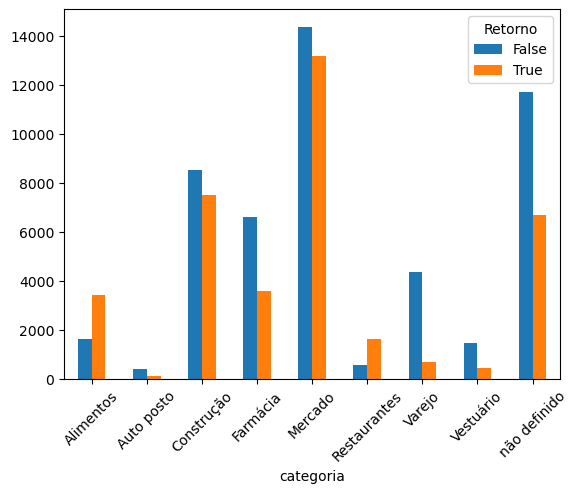

In [10]:
cat_retorno_pos.plot.bar()  # Cria gráfico de barras da tabela cruzada

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.show()  # Exibe o gráfico


## Cálculo do WOE

- Calcule o WOE das categorias, sendo que o evento em questão é a nota ter retorno>0.
- Analise este WOE por tabela e por gráfico.

In [12]:
tab = pd.crosstab(index=df_jan["categoria"], columns=df_jan["flag_credito"], margins=True, margins_name="Total")  
# Tabela cruzada entre `categoria` e `flag_credito`, com totais

tab  # Exibe a tabela cruzada


flag_credito,0,1,Total
categoria,,,
Alimentos,1608,3442,5050
Auto posto,405,135,540
Construção,8524,7523,16047
Farmácia,6607,3582,10189
Mercado,14381,13177,27558
Restaurantes,553,1626,2179
Varejo,4365,701,5066
Vestuário,1477,443,1920
não definido,11718,6689,18407


In [13]:
tab["perc_nao_evento"] = tab[0] / tab.loc["Total", 0]  
# Calcula a proporção de não evento em relação ao total

tab["perc_evento"] = tab[1] / tab.loc["Total", 1]  
# Calcula a proporção de evento em relação ao total

tab["WOE"] = np.log(tab["perc_evento"] / tab["perc_nao_evento"])  
# Calcula o Weight of Evidence (WOE)

tab  # Exibe a tabela com as novas colunas


flag_credito,0,1,Total,perc_nao_evento,perc_evento,WOE
categoria,,,,,,
Alimentos,1608,3442,5050,0.032395,0.092234,1.046342
Auto posto,405,135,540,0.008159,0.003618,-0.813331
Construção,8524,7523,16047,0.171723,0.201592,0.160360
Farmácia,6607,3582,10189,0.133104,0.095986,-0.326928
Mercado,14381,13177,27558,0.289718,0.353100,0.197846
Restaurantes,553,1626,2179,0.011141,0.043571,1.363801
Varejo,4365,701,5066,0.087937,0.018785,-1.543585
Vestuário,1477,443,1920,0.029755,0.011871,-0.918918
não definido,11718,6689,18407,0.236069,0.179243,-0.275381


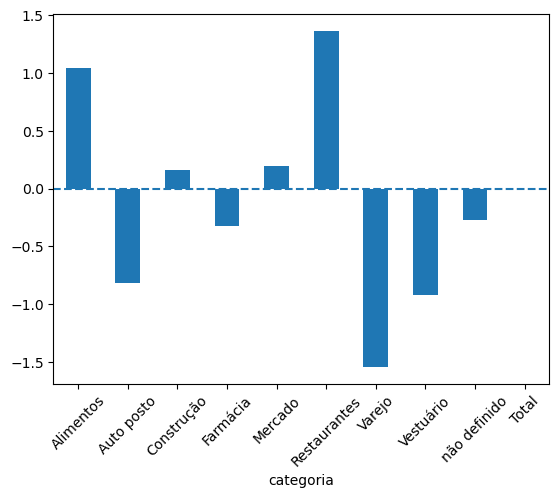

In [14]:
tab["WOE"].plot.bar()  
# Cria gráfico de barras para a coluna WOE

plt.axhline(linestyle='--')  
# Adiciona uma linha horizontal pontilhada ao gráfico

plt.xticks(rotation=45)  
# Rotaciona os rótulos do eixo x para melhor legibilidade

plt.show()  
# Exibe o gráfico


## Cálculo do *Information Value*

Calcule o *IV* dessa variável.

In [16]:
tab["IV_parcial"] = (tab["perc_evento"] - tab["perc_nao_evento"]) * tab["WOE"]  
# Calcula o Information Value parcial para cada categoria

print(f"Information Value da variável 'categoria': {tab['IV_parcial'].sum():.2%}\n")  
# Exibe o Information Value total da variável 'categoria'

tab  # Exibe a tabela com a nova coluna


Information Value da variável 'categoria': 27.88%



flag_credito,0,1,Total,perc_nao_evento,perc_evento,WOE,IV_parcial
categoria,,,,,,,
Alimentos,1608,3442,5050,0.032395,0.092234,1.046342,0.062613
Auto posto,405,135,540,0.008159,0.003618,-0.813331,0.003694
Construção,8524,7523,16047,0.171723,0.201592,0.160360,0.004790
Farmácia,6607,3582,10189,0.133104,0.095986,-0.326928,0.012135
Mercado,14381,13177,27558,0.289718,0.353100,0.197846,0.012540
Restaurantes,553,1626,2179,0.011141,0.043571,1.363801,0.044229
Varejo,4365,701,5066,0.087937,0.018785,-1.543585,0.106742
Vestuário,1477,443,1920,0.029755,0.011871,-0.918918,0.016434
não definido,11718,6689,18407,0.236069,0.179243,-0.275381,0.015649


## Conclua

Não se esqueça de registrar suas conclusões em uma célula de texto. <font color='red'>**Sugestão:**</font> tente alterar a cor da fonte nesta célula para diferenciá-la das demais.


In [18]:
tab["RC"] = np.exp(tab.WOE)  
# Calcula a razão de chances (RC) usando a exponencial do WOE
# tab["RC"] = tab["perc_evento"] / tab["perc_nao_evento"]  

tab  # Exibe a tabela com a nova coluna


flag_credito,0,1,Total,perc_nao_evento,perc_evento,WOE,IV_parcial,RC
categoria,,,,,,,,
Alimentos,1608,3442,5050,0.032395,0.092234,1.046342,0.062613,2.847218
Auto posto,405,135,540,0.008159,0.003618,-0.813331,0.003694,0.443379
Construção,8524,7523,16047,0.171723,0.201592,0.160360,0.004790,1.173934
Farmácia,6607,3582,10189,0.133104,0.095986,-0.326928,0.012135,0.721136
Mercado,14381,13177,27558,0.289718,0.353100,0.197846,0.012540,1.218775
Restaurantes,553,1626,2179,0.011141,0.043571,1.363801,0.044229,3.911032
Varejo,4365,701,5066,0.087937,0.018785,-1.543585,0.106742,0.213614
Vestuário,1477,443,1920,0.029755,0.011871,-0.918918,0.016434,0.398951
não definido,11718,6689,18407,0.236069,0.179243,-0.275381,0.015649,0.759283


> <font color=red>Podemos concluir, a partir do cálculo do *Weight of Evidence (WOE)*, que a chance de ocorrência de eventos na categoria de Restaurantes é 391% maior do que a chance geral, sem considerar as demais categorias. Da mesma forma, a categoria de Alimentos também se destaca, apresentando uma chance 285% maior em relação à chance geral.  
Quanto maior a distância do valor do WOE em relação a zero, maior é a evidência de que a categoria está propensa a eventos ou não eventos, permitindo uma discriminação mais clara da probabilidade de ocorrência. Nesse contexto, o setor de <u>Restaurantes</u> parece proporcionar um retorno maior em créditos, enquanto o setor de Varejo tende a oferecer um retorno menor.  
Ao interpretar o *Information Value (IV)* para a variável `categoria`, o valor de 27,88% indica um poder preditivo moderado, sugerindo uma capacidade razoável de distinguir entre eventos e não eventos.
</font>

---